In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
import os
import sys
# for fitting:
# from https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

In [12]:
os.getcwd()

'/home/wave/allpix2/allpixfiles/trapping_analysis/20220628'

In [13]:
import glob
glob.glob("*txt")

['20220622_charge_fraction_15e14.txt',
 '20220516_smaller_beam_charge_fraction_1e15.txt',
 '20220617_mpv_3e14.txt',
 '20220617_charge_fraction_3e14.txt',
 '20220516_smaller_beam_mpv_1e15.txt',
 '20220622_mpv_15e14.txt']

In [14]:
charge_fractions = {'3e14': {}, '1e15': {}, '15e14': {}}

for fluence in charge_fractions:
    charge_fractions[fluence] = {'bias': [], 'cce': [], 'stddev': []}
for fluence in charge_fractions.keys():
    print(fluence)
    filenames = glob.glob("*charge_fraction*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as cce_vs_bias:
        for line in cce_vs_bias:
            if 'x_axis' in line or line.startswith('#') or line.strip() == '': continue
            bias, cce, std = line.split()
            print(line)
            if 'None' in cce: continue
            charge_fractions[fluence]['bias'].append(float(bias))
            charge_fractions[fluence]['cce'].append(float(cce))
            charge_fractions[fluence]['stddev'].append(float(std))   

3e14
['20220617_charge_fraction_3e14.txt']
50    0.42208149    0.046391883

100    0.64488761    0.064267389

150    0.72514242    0.070718648

200    0.76054113    0.080345022

250    0.78508834    0.066937462

300    0.79896477    0.062356484

350    0.8096696    0.054945921

400    0.81532356    0.060968283

450    0.82248027    0.057460503

500    0.82387256    0.071840642

550    0.82813992    0.072228631

600    0.83219299    0.064672351

650    0.83085668    0.080446168

700    0.83699216    0.061496858

750    0.83668284    0.073281315

800    0.83666252    0.083439414

850    0.84256873    0.059753301

900    0.84151312    0.076551304

1e15
['20220516_smaller_beam_charge_fraction_1e15.txt']
50 0.20511923 0.026051811

100 0.37095504 0.035120948

150 0.56653079 0.067184009

200 0.62603457 0.057087088

250 0.65602693 0.060606741

300 0.67668264 0.064384693

350 0.68994667 0.066670307

400 0.70012195 0.071830858

450 0.71046846 0.060990125

500 0.71537418 0.070330152

550 0.722375

3
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.42208149, 0.64488761, 0.72514242, 0.76054113, 0.78508834, 0.79896477, 0.8096696, 0.81532356, 0.82248027, 0.82387256, 0.82813992, 0.83219299, 0.83085668, 0.83699216, 0.83668284, 0.83666252, 0.84256873, 0.84151312]
[0.046391883, 0.064267389, 0.070718648, 0.080345022, 0.066937462, 0.062356484, 0.054945921, 0.060968283, 0.057460503, 0.071840642, 0.072228631, 0.064672351, 0.080446168, 0.061496858, 0.073281315, 0.083439414, 0.059753301, 0.076551304]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$3$\cdot 10^{14}$/cm$^2$
1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.20511923, 0.37095504, 0.56653079, 0.62603457, 0.65602693, 0.67668264, 0.68994667, 0.70012195, 0.71046846, 0.71537418, 0.72237509, 0.72638099, 0.72643531, 0.73370456, 0.73699976, 0.73681391, 0.73762219, 0.74088099]
[0.02

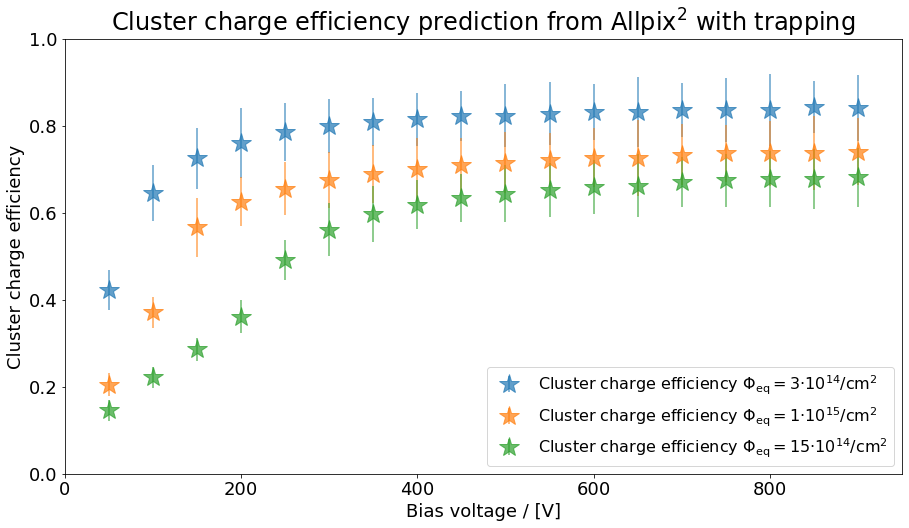

In [15]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_' + fluence + '_cce.png'), bbox_inches="tight")
plt.show()


In [21]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
plt.xlabel("Bias voltage / [V]", fontsize = 18)
plt.ylabel("Cluster charge efficiency", fontsize = 18)
plt.legend(fontsize = 16, loc='best')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + '_cce.png'), bbox_inches="tight")
plt.show()


KeyError: 'bias'

<Figure size 1080x576 with 0 Axes>

In [19]:
cluster_charges = {'3e14': {}, '1e15': {}, '15e14': {}}


for fluence in cluster_charges:
    cluster_charges[fluence] = {'bias': [], 'mpv': [], 'err': []}
for fluence in cluster_charges.keys():
    print(fluence)
    filenames = glob.glob("*mpv*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as mpv_vs_bias:
        for line in mpv_vs_bias:
            if 'mpv' in line or line.startswith('#') or line.strip() == '': continue
            bias, mpv, err = line.split()
            print(line)
            if 'None' in mpv: continue
            cluster_charges[fluence]['bias'].append(float(bias.split('e')[0]))
            cluster_charges[fluence]['mpv'].append(float(mpv))
            cluster_charges[fluence]['err'].append(float(err))   

3e14
['20220617_mpv_3e14.txt']
50 6.11831 0.0328972

100 9.48799 0.0447565

150 10.659 0.0519072

200 11.3331 0.0541461

250 11.5198 0.054389

300 11.7443 0.0514477

350 11.9809 0.0570906

400 11.9664 0.0577654

450 12.0496 0.0554618

500 12.1352 0.0622204

550 12.2254 0.0546101

600 12.3391 0.0529445

650 12.2232 0.0544409

700 12.2296 0.0553269

750 12.2389 0.0584334

800 12.3302 0.0596955

850 12.5412 0.055485

900 12.3983 0.0576212

1e15
['20220516_smaller_beam_mpv_1e15.txt']
50 2.96381 0.0139861

100 5.41358 0.024436

150 8.38586 0.0393335

200 9.15605 0.0404886

250 9.55415 0.0438133

300 10.0461 0.0448468

350 10.0509 0.0454235

400 10.2924 0.0491029

450 10.3715 0.0550831

500 10.6035 0.0467225

550 10.6353 0.046118

600 10.5897 0.0485838

650 10.6974 0.0488639

700 10.8374 0.0493836

750 10.9197 0.0517181

800 10.8248 0.0481538

850 10.8639 0.0527868

900 11.0703 0.0513498

15e14
['20220622_mpv_15e14.txt']
50 2.08471 0.0109579

100 3.19016 0.0154981

150 4.17006 0.0196654

200

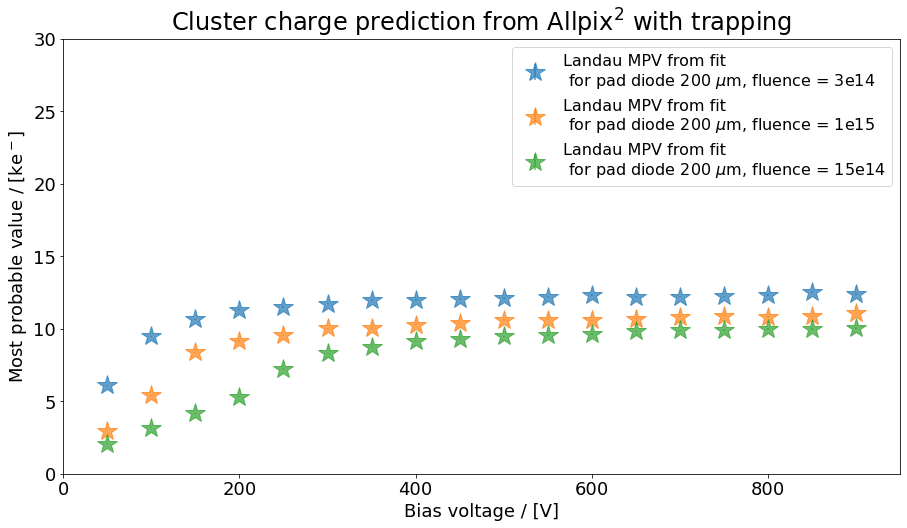

In [22]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
model = 'cmstracker'
voltage = -600
plot_file_name = ''
for fluence in cluster_charges:
    x = cluster_charges[fluence]['bias']
    y = cluster_charges[fluence]['mpv']
    yerr = cluster_charges[fluence]['err']
    plt.errorbar(x, y, yerr = yerr, label="Landau MPV from fit\n for pad diode " + str(thickness) + " $\mu$m, fluence = " + fluence, fmt=markerstyle, markersize=20, alpha=0.7)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    filenames = glob.glob("*" + model + "*dat")
    plt.title("Cluster charge prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Most probable value / [ke$^-$]", fontsize = 18)
    plot_file_name += os.path.basename(filename)[:-4] + '_'
    plt.ylim((0,30))
    plt.xlim((0,950))
plt.savefig(os.path.join(dirname, 'cluster_charge.png'), bbox_inches="tight")
plt.show()